<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/LR_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More on PCA

PCA works well when the data is linearly separable and the principal components capture most of the variance in the data. However, PCA might not work well when the variance along the principal components is equal (spherical or circular data distribution) or when there is non-linear separability in the data.

Let's simulate a 2D dataset with two Gaussian distributions, one where PCA should perform well (where variance along one axis is much greater than the other, resulting in an elliptical shape) and one where it should perform poorly (where variance along both axes are equal, resulting in a circular shape).

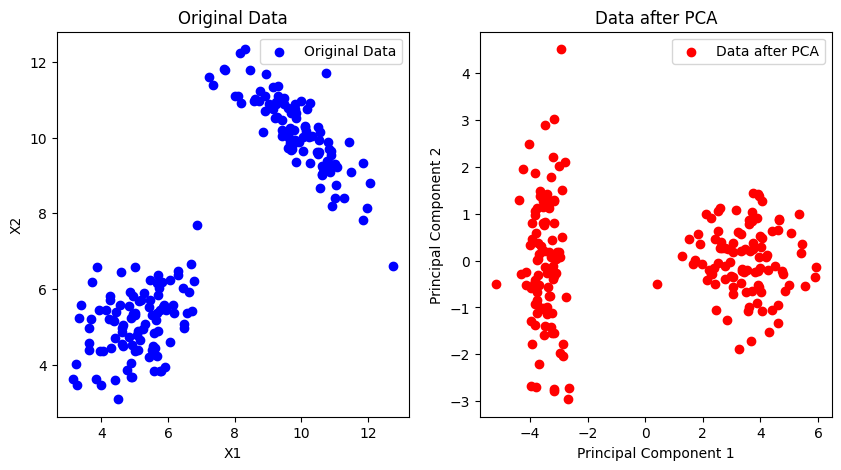

Explained variance ratio: [0.91298637 0.08701363]
PCA Components: 
[[-0.69337125 -0.72058054]
 [ 0.72058054 -0.69337125]]


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Generate synthetic data composed of mixture of Gaussians
np.random.seed(42)

# Data from Gaussian 1
mean1 = [5, 5]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Data from Gaussian 2
mean2 = [10, 10]
cov2 = [[1, -0.8], [-0.8, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Concatenate data
data = np.vstack((data1, data2))

# Plot original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.title("Original Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='red', label='Data after PCA')
plt.title("Data after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.show()

# Print explained variance
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Show the components
print(f'PCA Components: \n{pca.components_}')


In the resulting plots, you can see how PCA performs on each of these clusters. It is effective in distinguishing the first cluster (where there is more variance along one axis) but struggles with the second cluster (where the variance is equal along both axes). This is because PCA relies on finding the directions with maximum variance, so when the variance is equal in all directions, PCA doesn't provide much insight.

## More on Logistic Regression

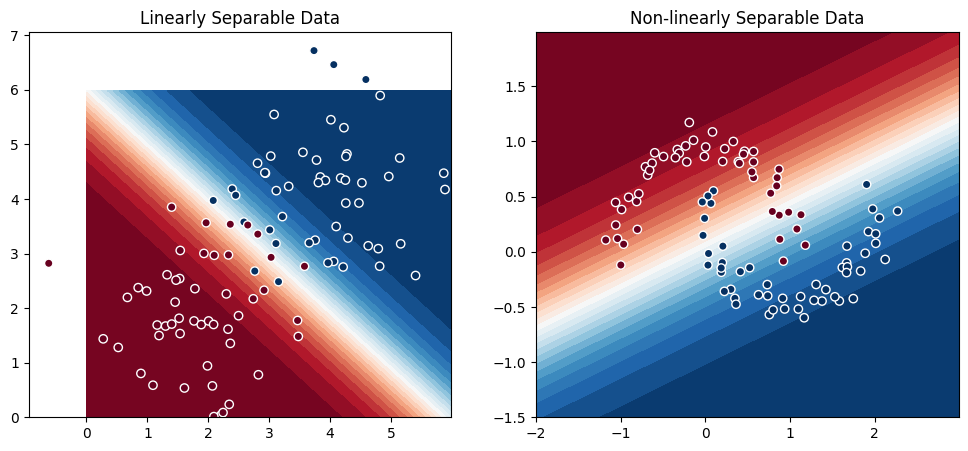

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, make_moons

# Creating two 2D datasets
# Case 1: Logistic Regression should work well (Linearly Separable)
X1, y1 = make_blobs(n_samples=100, centers=[[2, 2], [4, 4]], random_state=42)

# Case 2: Logistic Regression should work poorly (Non-linearly Separable)
X2, y2 = make_moons(n_samples=100, noise=0.1, random_state=42)

# Fitting Logistic Regression to the datasets
log_reg1 = LogisticRegression(random_state=42).fit(X1, y1)
log_reg2 = LogisticRegression(random_state=42).fit(X2, y2)

# Plotting the decision boundary for each case
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Case 1: Linearly Separable Data
xx, yy = np.mgrid[0:6:.01, 0:6:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg1.predict_proba(grid)[:, 1].reshape(xx.shape)
contour = ax[0].contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap="RdBu", edgecolor="white", linewidth=1)
ax[0].set_title("Linearly Separable Data")

# Case 2: Non-linearly Separable Data
xx, yy = np.mgrid[-2:3:.01, -1.5:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg2.predict_proba(grid)[:, 1].reshape(xx.shape)
contour = ax[1].contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, cmap="RdBu", edgecolor="white", linewidth=1)
ax[1].set_title("Non-linearly Separable Data")

plt.show()


# Sat images

In [71]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

satimages = fetch_openml(data_id=182, as_frame=True, parser="pandas")
satimages.data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6430 entries, 0 to 6429
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Aattr    6430 non-null   float64
 1   Battr    6430 non-null   float64
 2   Cattr    6430 non-null   float64
 3   Dattr    6430 non-null   float64
 4   Eattr    6430 non-null   float64
 5   Fattr    6430 non-null   float64
 6   A1attr   6430 non-null   float64
 7   B2attr   6430 non-null   float64
 8   C3attr   6430 non-null   float64
 9   D4attr   6430 non-null   float64
 10  E5attr   6430 non-null   float64
 11  F6attr   6430 non-null   float64
 12  A7attr   6430 non-null   float64
 13  B8attr   6430 non-null   float64
 14  C9attr   6430 non-null   float64
 15  D10attr  6430 non-null   float64
 16  E11attr  6430 non-null   float64
 17  F12attr  6430 non-null   float64
 18  A13attr  6430 non-null   float64
 19  B14attr  6430 non-null   float64
 20  C15attr  6430 non-null   float64
 21  D16attr  6430 

## Get FEATURES

In [56]:
X = satimages.data[satimages.feature_names]
X.describe(include="all")

,Aattr,Battr,Cattr,Dattr,Eattr,Fattr,A1attr,B2attr,C3attr,D4attr,...,C21attr,D22attr,E23attr,F24attr,A25attr,B26attr,C27attr,D28attr,E29attr,F30attr
count,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,...,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000
mean,-0.000846,-0.000748,-0.000603,-0.000272,-0.000863,-0.000787,-0.000611,-0.000333,-0.000767,-0.000779,...,-0.000430,-0.000178,-0.000626,-0.000717,-0.000525,-0.000212,-0.000596,-0.000666,-0.000469,-0.000126
std,0.999649,0.999944,0.999965,1.000196,0.999696,0.999958,0.999968,1.000220,0.999807,0.999904,...,1.000192,1.000271,0.999897,1.000022,1.000017,1.000271,0.999878,1.000013,1.000009,1.000288
min,-2.234329,-2.473310,-2.780894,-2.624275,-2.223275,-2.457498,-2.947095,-2.824420,-2.146330,-2.444776,...,-2.962511,-2.825539,-2.219281,-2.457440,-2.940074,-2.815531,-2.218211,-2.448131,-2.930494,-2.808050
25%,-0.690878,-0.550421,-0.858503,-0.719279,-0.674739,-0.534967,-0.846770,-0.712591,-0.661615,-0.520206,...,-0.855666,-0.719309,-0.662882,-0.531602,-0.844805,-0.715095,-0.651234,-0.519740,-0.834119,-0.761265
50%,-0.102897,0.148811,0.102692,-0.084280,-0.084821,0.076748,0.113379,-0.079042,-0.141965,0.092157,...,0.047268,-0.087440,-0.069968,0.081165,0.053167,-0.084964,-0.128909,0.050011,0.064327,-0.079004
75%,0.779075,0.848043,0.823588,0.497802,0.800057,0.863238,0.833490,0.501711,0.748864,0.835741,...,0.829810,0.491773,0.745289,0.869008,0.831409,0.492656,0.766507,0.838898,0.842981,0.498294
max,2.543020,2.333912,2.445605,3.778629,2.569812,2.348830,2.753787,3.933434,2.604758,2.060467,...,2.455091,3.756429,2.598145,2.050772,2.747083,3.905865,2.631955,2.066056,2.759666,3.909603


# Target to number

In [61]:
y = satimages.target
label_mapping = {label: i for i, label in enumerate(np.unique(y))}
y_numeric = np.array([label_mapping[label] for label in y])

## First PCA

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Added import

pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_


# Create the 2D projection scatter plot
fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    marker=dict(color=y_numeric, colorscale='Viridis', showscale=True),
    name='2D Projections'
))
fig.update_layout(
    title='2D Projections of Satimage Dataset',
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 2'),
    showlegend=False
)

# Create the PCA variance bar plot
fig2 = go.Figure(data=go.Bar(
    x=[f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    y=explained_variance_ratio,
    name='Explained Variance Ratio'
))
fig2.update_layout(
    title='Explained Variance Ratio by Principal Components',
    xaxis=dict(title='Principal Components'),
    yaxis=dict(title='Explained Variance Ratio'),
    showlegend=False
)

# Combine both plots into a single plot with one row and two columns
fig_combined = make_subplots(rows=1, cols=2)
fig_combined.add_trace(fig.data[0], row=1, col=1)
fig_combined.add_trace(fig2.data[0], row=1, col=2)

# Configure the layout
fig_combined.update_layout(
    title_text='2D Projections and Explained Variance Ratio',
    height=600,
    width=1200,
    showlegend=False
)

# Show the plot
fig_combined.show()

# Logistic Regression + PCA pipeline

In [73]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA(n_components=5)
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('logistic', LogisticRegression(max_iter=10000, tol=0.1))])

In [74]:
# Perform prediction using the fitted pipeline
y_pred = pipe.predict(X)

# Perform probability estimation using the fitted pipeline
y_proba = pipe.predict_proba(X)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.8423017107309487
